<h1> Analysis of Datasets </h1>
<h2> Using Logistic Regression and Naive Bayes </h2>

<h2>Dataset 1: Ionosphere Data</h2>

Dataset obtained from: https://archive.ics.uci.edu/ml/datasets/ionosphere

Approach:  We first prepare the dataset to train both the models. We then train the model and compare the performance of both the algorithms. 

<h2> Section 1: Preparing the Data </h2>
<h3> Loading the dataset </h3>

In [1]:
#loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


path = 'Datasets/ionosphere.data'
rawFileData = pd.read_csv(path)

<h3> Data Overview </h3>
Lets overview our dataset by displaying the top five records

In [2]:
#oveview dataset
rawFileData.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [3]:
#oveview dataset
dim = rawFileData.shape
rows = dim[0]
cols = dim[1]

print("There are a total of " + str(rows) + " rows and " + str(cols) + " columns in our dataset.")

There are a total of 350 rows and 35 columns in our dataset.


<h3> Displaying basic statisics about the data </h3>

In [4]:
rawFileData.describe()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471518,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335318,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816777,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Cleaning the data by removing rows with missing values </h3>

According to the source website, there are no missing values in this dataset.

<h3> Extracting the labels and separating data</h3>

In [5]:
#get label column
Y_str = rawFileData['g']
#removing the labels column from the dataset
rawFileData.drop(['g'],axis=1, inplace=True)

In [6]:
#saving the rest of data in variable
X_str = rawFileData

<h3> Mapping the labels to numerical values </h3>

We map "b" to 0
and "g" to 1

In [7]:
Y_str = Y_str.replace({"b": "0"}, regex=True)
Y_str = Y_str.replace({"g": "1"}, regex=True)

<h3> Converting to numpy array </h3>
We save the X (data) and Y (labels) as numpy array to perform calculations.

In [8]:
Y = Y_str.to_numpy()
X = X_str.to_numpy()

<h3> Converting all values into floats </h3>
For computation in numpy

In [9]:
#string to float
Y_labels = Y.astype(np.float)
X_data = X.astype(np.float)

<h2> Section 2: Implementing the Models </h2>

The models have been implemented in a separate file. 
We import these modules to work with them.

In [10]:
#importing the implementation for the algorithms
import L_Regression
import N_Bayes


#making a class instance
logistic = L_Regression.LogisticRegression()
naive = N_Bayes.NaiveBayes()

<h2> Section 3: Running Experiments </h2>

We run the experiments stated in the project requirements.

<h2> EXPERIMENT 1: Compare the accuracy of naive Bayes and logistic regression </h2>

<h3> Fitting the models </h3>


In [11]:
AccuracyTrace = logistic.fit(X_data,Y_labels)
naive.fit(X_data, Y_labels)

<h3> Accuracy of Logistic Regression </h3>

In [12]:
logistic.evaluate_acc(Y_labels, logistic.predict(X))

0.8857142857142857

Hence, our Logistic Regression model has an accuracy of 88.57% on the given dataset.

<h3> Accuracy of Naive Bayes </h3>

In [13]:
naive.evaluate_acc(Y_labels, naive.predict(X))

0.8142857142857143

Hence, our Naive Bayes model has an accuracy of 81.43% on the given dataset.

Experiment 1 concludes that Logistic Regression is more accurate than Naive Bayes for this dataset.

<h2> EXPERIMENT 2: Test different learning rates for gradient descent applied to logistic regression </h2>


<h4> 1. Learning Rate vs Accuracy </h4>

In [14]:
learning_rates = [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]

In [15]:
accuracy = []
for rates in learning_rates:
    accuracy.append(logistic.fit(X_data, Y_labels, rates).pop())
table1 = pd.DataFrame({'Learning Rate' : learning_rates, 'Final Accuracy' : accuracy})

In [16]:
table1

,Learning Rate,Final Accuracy
0,0.00001,0.914286
1,0.00010,0.914286
2,0.00100,0.902857
3,0.01000,0.885714
4,0.10000,0.831429
5,1.00000,0.700000
6,10.00000,0.360000


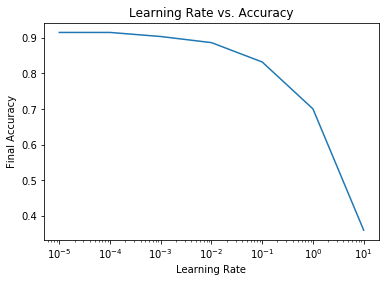

In [17]:
plt.xlabel('Learning Rate') 
plt.ylabel('Final Accuracy') 
plt.title('Learning Rate vs. Accuracy') 
plt.plot(learning_rates, accuracy)
plt.xscale("log")
plt.show()

<h4> 2. Number of Iterations vs Accuracy </h4>

In [18]:
count=0
Iteration = []
for i in AccuracyTrace:
    count = count + 1
    Iteration.append(count)

In [19]:
table2 = pd.DataFrame({'Iteration' : Iteration, 'Accuracy' : AccuracyTrace})

In [20]:
table2

,Iteration,Accuracy
0,1,0.360000
1,2,0.694286
2,3,0.717143
3,4,0.742857
4,5,0.765714
...,...,...
74,75,0.885714
75,76,0.885714
76,77,0.885714
77,78,0.885714


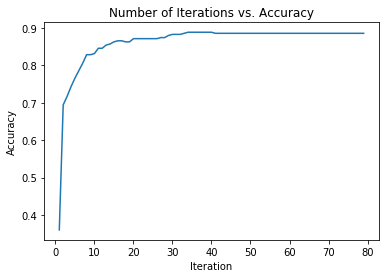

In [21]:
plt.xlabel('Iteration') 
plt.ylabel('Accuracy') 
plt.title('Number of Iterations vs. Accuracy') 
plt.plot(Iteration, AccuracyTrace)
plt.show()

<h2> EXPERIMENT 3: Compare the accuracy of the two models as a function of the size of dataset </h2>


<h3> 1. Logistic Regression </h3>

In [22]:
percentageTrainingSize = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dataSize = []
percentages = []
for per in percentageTrainingSize:
    dataSize.append(per*X_data.shape[0])
    percentages.append(str(per*100)+"%")


In [23]:
dataSize = [int(i) for i in dataSize]

In [24]:
Acc = []
for size in dataSize:
    Acc.append(logistic.fit(X_data[1:size], Y_labels[1:size]).pop())

In [25]:
Acc

[0.9565217391304348,
 0.8942307692307693,
 0.8489208633093526,
 0.8448275862068966,
 0.8516746411483254,
 0.8518518518518519,
 0.8602150537634409,
 0.8757961783439491,
 0.8853868194842407]

In [26]:
table3 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc})

In [27]:
table3

,Dataset Size (%),Accuracy
0,20.0%,0.956522
1,30.0%,0.894231
2,40.0%,0.848921
3,50.0%,0.844828
4,60.0%,0.851675
5,70.0%,0.851852
6,80.0%,0.860215
7,90.0%,0.875796
8,100%,0.885387


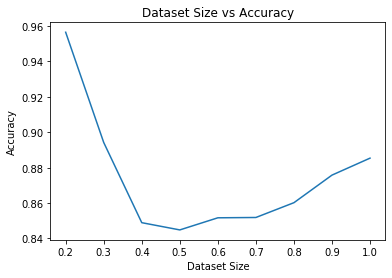

In [28]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc)
plt.show()

<h3> 2. Naive Bayes </h3>

In [29]:
Acc2 = []
for size in dataSize:
    Acc2.append(naive.evaluate_acc(Y_labels[1:size], naive.predict(X[1:size])))

In [30]:
table4 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc})

In [31]:
table4

,Dataset Size (%),Accuracy
0,20.0%,0.956522
1,30.0%,0.894231
2,40.0%,0.848921
3,50.0%,0.844828
4,60.0%,0.851675
5,70.0%,0.851852
6,80.0%,0.860215
7,90.0%,0.875796
8,100%,0.885387


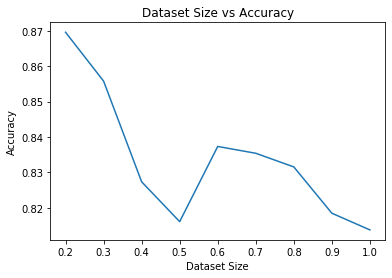

In [32]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc2)
plt.show()